In [1]:
import random
import numpy as np
import torch
import os
import pathlib
import pickle
import pandas as pd
torch.manual_seed(42)
torch.cuda.manual_seed(42)
from Performance import performance_evaluation
perfs = performance_evaluation()

from Performance import H2h_Regret_Evaluation
h2h_regret_eva = H2h_Regret_Evaluation()

from Data import Data_Simulator
DS_Obj = Data_Simulator()

from Oracle import Oracle_Processing
Oracle_Proc = Oracle_Processing()

from OLS import OLS_Processing
OLS_Proc = OLS_Processing()

from DDR import DDR_Processing
DDR_Proc = DDR_Processing()

from PYEPO import EPO_Processing
PYEPO_Proc = EPO_Processing()

from Data_Load_Store import Load_Store_Methods
Data_LSM = Load_Store_Methods()

In [2]:
def run_all_approaches(DataPath,mu_all,lamb_all,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process):
        
        x_test_all,c_test_all,x_train_all,c_train_all,noise_train_all,noise_test_all,W_star_all = Data_LSM.load_input_data(DataPath)

        cost_Oracle_Post_all,cost_Oracle_Ante_all = Oracle_Proc.Implement_Oracle(arcs, grid,mis,bump,\
                                                                    W_star_all,x_test_all,noise_test_all,\
                                                                    iteration_all,num_feat,data_generation_process)
        
        cost_OLS_Post_all,cost_OLS_Ante_all = OLS_Proc.Implement_OLS(arcs, grid,mis,bump,\
                                                            W_star_all,x_test_all,noise_test_all,x_train_all,c_train_all,\
                                                            iteration_all,num_feat,data_generation_process)

        cost_DDR_Post_all,cost_DDR_Ante_all = DDR_Proc.Implement_DDR(mu_all,lamb_all,arcs, grid,mis,bump,\
                                                                    W_star_all,x_test_all,noise_test_all,x_train_all,c_train_all,\
                                                                        iteration_all,num_feat,data_generation_process)

        Data_LSM.store_Oracle_OLS_DDR_Cost(DataPath,cost_Oracle_Post_all,cost_Oracle_Ante_all,\
                                  cost_OLS_Post_all,cost_OLS_Ante_all,\
                                  cost_DDR_Post_all,cost_DDR_Ante_all)

In [3]:
def run_EPO_approaches(DataPath,method_names,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process):
        
        x_test_all,c_test_all,x_train_all,c_train_all,noise_train_all,noise_test_all,W_star_all = Data_LSM.load_input_data(DataPath)

        batch_size = 20
        num_epochs = 1000
        # from PYEPO import PyEPO_Method
        # epo_runner = PyEPO_Method()
        # method_names = ["spo+"]
        cost_EPO_Post_all,cost_EPO_Ante_all = PYEPO_Proc.Implement_EPO(DataPath,iteration_all,batch_size,num_epochs,method_names,\
                                                    W_star_all,bump,x_train_all,c_train_all,x_test_all,noise_test_all,\
                                                    arcs,grid,perfs,num_feat,mis,data_generation_process)

        with open(DataPath+'cost_'+method_names[0]+'_Post_all.pkl', "wb") as tf:
            pickle.dump(cost_EPO_Post_all,tf)
        with open(DataPath+'cost_'+method_names[0]+'_Ante_all.pkl', "wb") as tf:
            pickle.dump(cost_EPO_Ante_all,tf)

### Parameters

In [12]:
grid = (3,3) # grid size
from Network import network_design
Network = network_design()
arcs,arc_index_mapping = Network._getArcs(grid)

num_test = 1000
lower = 0 # coef lower bound
upper = 1 # coef upper bound
d = (grid[0] - 1) * (grid[0] - 1) * 2 + 2 * (grid[0] - 1) # num of arcs
num_nodes = grid[0]*grid[0]
coef_seed = 1

x_dist = 'uniform'
e_dist = 'normal'
x_low = -2
x_up = 2
x_mean = 2
x_var = 2
bump = 100
iteration_all = np.arange(0,100)
mu_all = np.round(np.arange(0.7,0.95,0.05),4)
lamb_all = np.round(np.arange(0.5,0.85,0.05),4)

In [5]:
data_generation_process = "SPO_Data_Generation"
# data_generation_process = "DDR_Data_Generation"
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
project_directory = os.path.dirname(os.path.dirname(os.path.dirname(parent_directory)))
DataPath_Parent = project_directory + '/Data_JOC_R1/Shortest_Path/Various_Settings_' + data_generation_process + f'/{grid[0]}by{grid[1]}_grid/'
pathlib.Path(DataPath_Parent).mkdir(parents=True, exist_ok=True)
print("DataPath_parent:", DataPath_Parent)

DataPath_parent: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_SPO_Data_Generation/3by3_grid/


In [6]:
Result_dir = DataPath_Parent + "Result/"
pathlib.Path(Result_dir).mkdir(parents=True, exist_ok=True)

#### Impact of model misspecification

In [32]:
for deg in deg_all:
    mis = deg # model misspecification
    if deg != 1.0:
        DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
        print("DataPath:", DataPath)
        run_all_approaches(DataPath,mu_all,lamb_all,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_SPO_Data_Generation/3by3_grid/data_size=100_deg=0.4_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
Oracle: iter= 20 ,cost_Oracle_Ante= 9.974746843194604
Oracle: iter= 40 ,cost_Oracle_Ante= 9.856448226220069
Oracle: iter= 60 ,cost_Oracle_Ante= 9.949329095991978
Oracle: iter= 80 ,cost_Oracle_Ante= 9.918527311495193
OLS: iter= 20 ,cost_OLS_Ante= 10.066202257534798
OLS: iter= 40 ,cost_OLS_Ante= 9.91609848122351
OLS: iter= 60 ,cost_OLS_Ante= 10.014275543903883
OLS: iter= 80 ,cost_OLS_Ante= 10.07851624680234
DDR: iter= 20 ,mu= 0.9 ,lamb= 0.8 ,cost_DDR_Ante = 10.066129823264038
DDR: iter= 40 ,mu= 0.9 ,lamb= 0.8 ,cost_DDR_Ante = 9.915228009964421
DDR: iter= 60 ,mu= 0.9 ,lamb= 0.8 ,cost_DDR_Ante = 10.016941095087015
DDR: iter= 80 ,mu= 0.9 ,lamb= 0.8 ,cost_DDR_Ante = 10.075905249694296
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Sho

In [9]:
e = 0.5
alpha = e
num_train = 100
num_feat = 5
p = num_feat
deg_all = [0.4,0.6,0.8,1.0,1.2,1.4,1.6,2.0,3.0,4.0]
# for deg in deg_all:
#     mis = deg # model misspecification
#     if deg != 1.0:
#         DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
#         print("DataPath:", DataPath)
#         run_EPO_approaches(DataPath,["spo+"],arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

In [14]:
for deg in deg_all:
    mis = deg # model misspecification
    DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
    print("DataPath:", DataPath)
    run_EPO_approaches(DataPath,["pg"],arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_SPO_Data_Generation/3by3_grid/data_size=100_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
['pg'] : iter= 20 ,cost_EPO_Ante= 16.16712889194367
['pg'] : iter= 40 ,cost_EPO_Ante= 15.820747512756704
['pg'] : iter= 60 ,cost_EPO_Ante= 15.984157668019506
['pg'] : iter= 80 ,cost_EPO_Ante= 15.973467532856436


In [69]:
for deg in deg_all:
    mis = deg # model misspecification
    DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
    print("DataPath:", DataPath)
    run_EPO_approaches(DataPath,["ltr"],arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_SPO_Data_Generation/3by3_grid/data_size=100_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
['ltr'] : iter= 20 ,cost_EPO_Ante= 16.121822141615986
['ltr'] : iter= 40 ,cost_EPO_Ante= 15.670889912464526
['ltr'] : iter= 60 ,cost_EPO_Ante= 15.860857581963412
['ltr'] : iter= 80 ,cost_EPO_Ante= 15.698259587303193


In [72]:
e = 0.5
alpha = e
num_train = 100
num_feat = 5
p = num_feat
deg_all = [0.4,0.6,0.8,1.0,1.2,1.4,1.6,2.0,3.0,4.0]
regret_DDR_vs_SPO_d_ante_Dict = {}; h2h_DDR_vs_SPO_d_ante_Dict = {}

for mu in mu_all:
    for lamb in lamb_all:
        regret_d_ante = np.zeros(len(deg_all)); h2h_d_ante = np.zeros(len(deg_all))
        _index = 0
        for deg in deg_all:
            mis = deg # model misspecification
            DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
            print("DataPath:", DataPath)

            cost_Oracle_Post_all,cost_Oracle_Ante_all,cost_OLS_Post_all,cost_OLS_Ante_all,cost_DDR_Post_all,cost_DDR_Ante_all = Data_LSM.load_cost_data(DataPath)
            with open(DataPath+'cost_spo+_Ante_all.pkl', "rb") as tf:
                cost_SPO_Ante_all = pickle.load(tf)            
    
            h2h_d_ante[_index], regret_d_ante[_index] = h2h_regret_eva.calculate_h2h_regret(mu,lamb,iteration_all,\
                                cost_DDR_Post_all,cost_OLS_Post_all,cost_Oracle_Post_all,\
                                    cost_DDR_Ante_all,cost_SPO_Ante_all,cost_Oracle_Ante_all)
            _index = _index + 1
        regret_DDR_vs_SPO_d_ante_Dict[mu,lamb] = regret_d_ante
        h2h_DDR_vs_SPO_d_ante_Dict[mu,lamb] = h2h_d_ante
with open(Result_dir+'regret_DDR_vs_SPO_d_ante_Dict.pkl', "wb") as tf:
    pickle.dump(regret_DDR_vs_SPO_d_ante_Dict,tf)
with open(Result_dir+'h2h_DDR_vs_SPO_d_ante_Dict.pkl', "wb") as tf:
    pickle.dump(h2h_DDR_vs_SPO_d_ante_Dict,tf)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_SPO_Data_Generation/3by3_grid/data_size=100_deg=0.4_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_SPO_Data_Generation/3by3_grid/data_size=100_deg=0.6_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_SPO_Data_Generation/3by3_grid/data_size=100_deg=0.8_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_SPO_Data_Generation/3by3_grid/data_size=100_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_

In [15]:
e = 0.5
alpha = e
num_train = 100
num_feat = 5
p = num_feat
deg_all = [0.4,0.6,0.8,1.0,1.2,1.4,1.6,2.0,3.0,4.0]
regret_DDR_vs_PG_d_ante_Dict = {}; h2h_DDR_vs_PG_d_ante_Dict = {}

for mu in mu_all:
    for lamb in lamb_all:
        regret_d_ante = np.zeros(len(deg_all)); h2h_d_ante = np.zeros(len(deg_all))
        _index = 0
        for deg in deg_all:
            mis = deg # model misspecification
            DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
            print("DataPath:", DataPath)

            cost_Oracle_Post_all,cost_Oracle_Ante_all,cost_OLS_Post_all,cost_OLS_Ante_all,cost_DDR_Post_all,cost_DDR_Ante_all = Data_LSM.load_cost_data(DataPath)
            with open(DataPath+'cost_pg_Ante_all.pkl', "rb") as tf:
                cost_PG_Ante_all = pickle.load(tf)            
            h2h_d_ante[_index], regret_d_ante[_index] = h2h_regret_eva.calculate_h2h_regret(mu,lamb,iteration_all,\
                                cost_DDR_Post_all,cost_OLS_Post_all,cost_Oracle_Post_all,\
                                    cost_DDR_Ante_all,cost_PG_Ante_all,cost_Oracle_Ante_all)
            _index = _index + 1
        regret_DDR_vs_PG_d_ante_Dict[mu,lamb] = regret_d_ante
        h2h_DDR_vs_PG_d_ante_Dict[mu,lamb] = h2h_d_ante
with open(Result_dir+'regret_DDR_vs_PG_d_ante_Dict.pkl', "wb") as tf:
    pickle.dump(regret_DDR_vs_PG_d_ante_Dict,tf)
with open(Result_dir+'h2h_DDR_vs_PG_d_ante_Dict.pkl', "wb") as tf:
    pickle.dump(h2h_DDR_vs_PG_d_ante_Dict,tf)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_SPO_Data_Generation/3by3_grid/data_size=100_deg=0.4_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_SPO_Data_Generation/3by3_grid/data_size=100_deg=0.6_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_SPO_Data_Generation/3by3_grid/data_size=100_deg=0.8_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_SPO_Data_Generation/3by3_grid/data_size=100_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_

In [70]:
e = 0.5
alpha = e
num_train = 100
num_feat = 5
p = num_feat
deg_all = [0.4,0.6,0.8,1.0,1.2,1.4,1.6,2.0,3.0,4.0]
regret_DDR_vs_LTR_d_ante_Dict = {}; h2h_DDR_vs_LTR_d_ante_Dict = {}

for mu in mu_all:
    for lamb in lamb_all:
        regret_d_ante = np.zeros(len(deg_all)); h2h_d_ante = np.zeros(len(deg_all))
        _index = 0
        for deg in deg_all:
            mis = deg # model misspecification
            DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
            print("DataPath:", DataPath)

            cost_Oracle_Post_all,cost_Oracle_Ante_all,cost_OLS_Post_all,cost_OLS_Ante_all,cost_DDR_Post_all,cost_DDR_Ante_all = Data_LSM.load_cost_data(DataPath)
            with open(DataPath+'cost_ltr_Ante_all.pkl', "rb") as tf:
                cost_LTR_Ante_all = pickle.load(tf)            
    
            h2h_d_ante[_index], regret_d_ante[_index] = h2h_regret_eva.calculate_h2h_regret(mu,lamb,iteration_all,\
                                cost_DDR_Post_all,cost_OLS_Post_all,cost_Oracle_Post_all,\
                                    cost_DDR_Ante_all,cost_LTR_Ante_all,cost_Oracle_Ante_all)
            _index = _index + 1
        regret_DDR_vs_LTR_d_ante_Dict[mu,lamb] = regret_d_ante
        h2h_DDR_vs_LTR_d_ante_Dict[mu,lamb] = h2h_d_ante
with open(Result_dir+'regret_DDR_vs_LTR_d_ante_Dict.pkl', "wb") as tf:
    pickle.dump(regret_DDR_vs_LTR_d_ante_Dict,tf)
with open(Result_dir+'h2h_DDR_vs_LTR_d_ante_Dict.pkl', "wb") as tf:
    pickle.dump(h2h_DDR_vs_LTR_d_ante_Dict,tf)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_SPO_Data_Generation/3by3_grid/data_size=100_deg=0.4_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_SPO_Data_Generation/3by3_grid/data_size=100_deg=0.6_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_SPO_Data_Generation/3by3_grid/data_size=100_deg=0.8_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_SPO_Data_Generation/3by3_grid/data_size=100_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_

In [ ]:
from scipy.stats import gaussian_kde
from matplotlib import gridspec
import seaborn as sns
import matplotlib.pyplot as plt

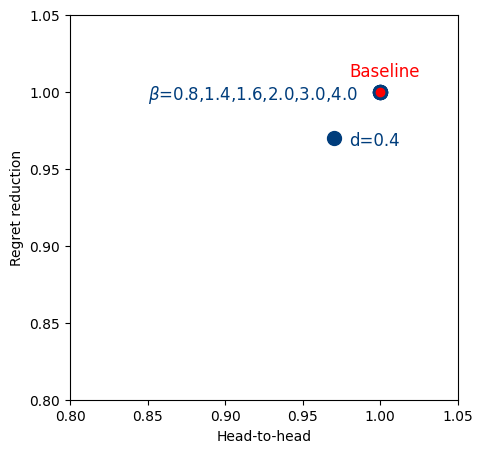

In [73]:
mu = 0.75
lamb = 0.8
regret_d_ante_ = regret_DDR_vs_SPO_d_ante_Dict[mu,lamb]
h2h_d_ante_ = h2h_DDR_vs_SPO_d_ante_Dict[mu,lamb]

ms = 10 # marker size
fs = 12 # font size
ls = 12 # label size
import matplotlib.pyplot as plt

fig, ax = plt.subplots( figsize=(5, 5))
# axes = ax.flatten()
# # ---- 子图 3: d 的影响 ----
d_indices = [0, 2, 5, 6, 7, 8, 9]
for i in d_indices:
    ax.plot(h2h_d_ante_[i], regret_d_ante_[i], color='#003D7C', marker='o', markersize = ms,linestyle='None')
ax.plot(h2h_d_ante_[3], regret_d_ante_[3],color='red', marker='o', markersize = 6,linestyle='None')
ax.text(h2h_d_ante_[3] - 0.02, regret_d_ante_[3] + 0.01, 'Baseline', color='red',fontsize=fs)

ax.text(h2h_d_ante_[0] + 0.01, regret_d_ante_[0]-0.005, f'd={deg_all[0]}', color='#003D7C',fontsize=fs)
# ax.text(h2h_d_ante[1] - 0.04, regret_d_ante[1], f'd={deg_all[1]}', color='#003D7C',fontsize=fs)
ax.text(h2h_d_ante_[2] - 0.15, regret_d_ante_[2] - 0.005, r'$\beta$=0.8,1.4,1.6,2.0,3.0,4.0', color='#003D7C',fontsize=fs)

# ax.set_title('Effect of model misspecification: $\\beta$')
ax.set_xlabel('Head-to-head')
ax.set_ylabel('Regret reduction')
# ax.grid(True)

# # ---- 整体设置 ----

ax.axvline(0.5, linestyle='dashed', alpha=0.8, color='k')
ax.axhline(0.0, linestyle='dashed', alpha=0.8, color='k')
ax.set_xlim(0.8, 1.05)
ax.set_ylim(0.8, 1.05)
ax.label_outer()

# plt.tight_layout()
# fig.savefig(Result_dir + f'DDR_vs_SPO_Model_Mis_ante_mu={mu}_lamb={lamb}_subfigures.pdf', format='pdf', bbox_inches="tight")
plt.show()


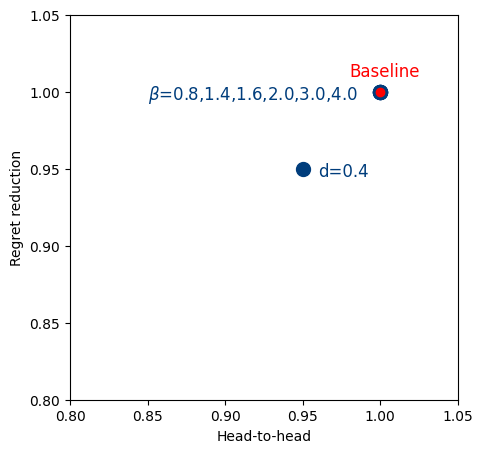

In [ ]:
mu = 0.75
lamb = 0.8
regret_d_ante_ = regret_DDR_vs_PG_d_ante_Dict[mu,lamb]
h2h_d_ante_ = h2h_DDR_vs_PG_d_ante_Dict[mu,lamb]

ms = 10 # marker size
fs = 12 # font size
ls = 12 # label size
import matplotlib.pyplot as plt

fig, ax = plt.subplots( figsize=(5, 5))
# axes = ax.flatten()
# # ---- 子图 3: d 的影响 ----
d_indices = [0, 2, 5, 6, 7, 8, 9]
for i in d_indices:
    ax.plot(h2h_d_ante_[i], regret_d_ante_[i], color='#003D7C', marker='o', markersize = ms,linestyle='None')
ax.plot(h2h_d_ante_[3], regret_d_ante_[3],color='red', marker='o', markersize = 6,linestyle='None')
ax.text(h2h_d_ante_[3] - 0.02, regret_d_ante_[3] + 0.01, 'Baseline', color='red',fontsize=fs)

ax.text(h2h_d_ante_[0] + 0.01, regret_d_ante_[0]-0.005, f'd={deg_all[0]}', color='#003D7C',fontsize=fs)
# ax.text(h2h_d_ante[1] - 0.04, regret_d_ante[1], f'd={deg_all[1]}', color='#003D7C',fontsize=fs)
ax.text(h2h_d_ante_[2] - 0.15, regret_d_ante_[2] - 0.005, r'$\beta$=0.8,1.4,1.6,2.0,3.0,4.0', color='#003D7C',fontsize=fs)

# ax.set_title('Effect of model misspecification: $\\beta$')
ax.set_xlabel('Head-to-head')
ax.set_ylabel('Regret reduction')
# ax.grid(True)

# # ---- 整体设置 ----

ax.axvline(0.5, linestyle='dashed', alpha=0.8, color='k')
ax.axhline(0.0, linestyle='dashed', alpha=0.8, color='k')
ax.set_xlim(0.8, 1.05)
ax.set_ylim(0.8, 1.05)
ax.label_outer()

# plt.tight_layout()
fig.savefig(Result_dir + f'DDR_vs_PG_Model_Mis_ante_mu={mu}_lamb={lamb}_subfigures.pdf', format='pdf', bbox_inches="tight")
plt.show()


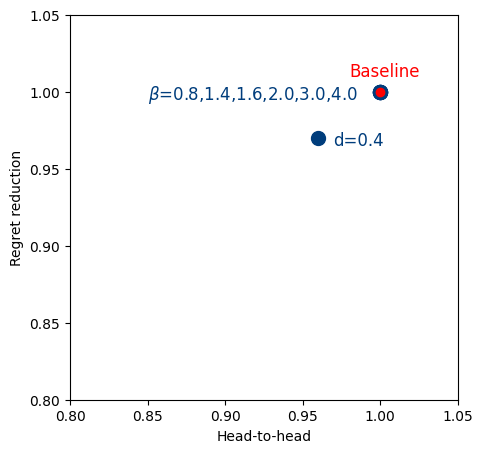

In [71]:
mu = 0.75
lamb = 0.8
regret_d_ante_ = regret_DDR_vs_LTR_d_ante_Dict[mu,lamb]
h2h_d_ante_ = h2h_DDR_vs_LTR_d_ante_Dict[mu,lamb]

ms = 10 # marker size
fs = 12 # font size
ls = 12 # label size
import matplotlib.pyplot as plt

fig, ax = plt.subplots( figsize=(5, 5))
# axes = ax.flatten()
# # ---- 子图 3: d 的影响 ----
d_indices = [0, 2, 5, 6, 7, 8, 9]
for i in d_indices:
    ax.plot(h2h_d_ante_[i], regret_d_ante_[i], color='#003D7C', marker='o', markersize = ms,linestyle='None')
ax.plot(h2h_d_ante_[3], regret_d_ante_[3],color='red', marker='o', markersize = 6,linestyle='None')
ax.text(h2h_d_ante_[3] - 0.02, regret_d_ante_[3] + 0.01, 'Baseline', color='red',fontsize=fs)

ax.text(h2h_d_ante_[0] + 0.01, regret_d_ante_[0]-0.005, f'd={deg_all[0]}', color='#003D7C',fontsize=fs)
# ax.text(h2h_d_ante[1] - 0.04, regret_d_ante[1], f'd={deg_all[1]}', color='#003D7C',fontsize=fs)
ax.text(h2h_d_ante_[2] - 0.15, regret_d_ante_[2] - 0.005, r'$\beta$=0.8,1.4,1.6,2.0,3.0,4.0', color='#003D7C',fontsize=fs)

# ax.set_title('Effect of model misspecification: $\\beta$')
ax.set_xlabel('Head-to-head')
ax.set_ylabel('Regret reduction')
# ax.grid(True)

# # ---- 整体设置 ----

ax.axvline(0.5, linestyle='dashed', alpha=0.8, color='k')
ax.axhline(0.0, linestyle='dashed', alpha=0.8, color='k')
ax.set_xlim(0.8, 1.05)
ax.set_ylim(0.8, 1.05)
ax.label_outer()

# plt.tight_layout()
fig.savefig(Result_dir + f'DDR_vs_LTR_Model_Mis_ante_mu={mu}_lamb={lamb}_subfigures.pdf', format='pdf', bbox_inches="tight")
plt.show()


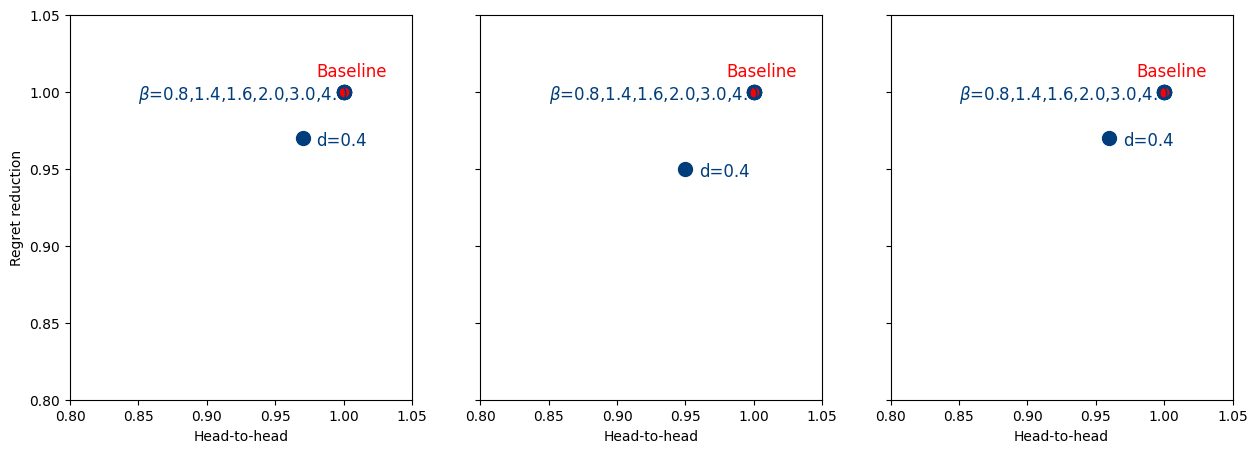

In [ ]:
mu = 0.75
lamb = 0.8


ms = 10 # marker size
fs = 12 # font size
ls = 12 # label size
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,3, figsize=(15, 5))
# axes = ax.flatten()
# # ---- 子图 3: d 的影响 ----
d_indices = [0, 2, 5, 6, 7, 8, 9]

### SPO+ ####
ax = axes[0]
regret_d_ante_ = regret_DDR_vs_SPO_d_ante_Dict[mu,lamb]
h2h_d_ante_ = h2h_DDR_vs_SPO_d_ante_Dict[mu,lamb]
for i in d_indices:
    ax.plot(h2h_d_ante_[i], regret_d_ante_[i], color='#003D7C', marker='o', markersize = ms,linestyle='None')
ax.plot(h2h_d_ante_[3], regret_d_ante_[3],color='red', marker='o', markersize = 6,linestyle='None')
ax.text(h2h_d_ante_[3] - 0.02, regret_d_ante_[3] + 0.01, 'Baseline', color='red',fontsize=fs)

ax.text(h2h_d_ante_[0] + 0.01, regret_d_ante_[0]-0.005, f'd={deg_all[0]}', color='#003D7C',fontsize=fs)
# ax.text(h2h_d_ante[1] - 0.04, regret_d_ante[1], f'd={deg_all[1]}', color='#003D7C',fontsize=fs)
ax.text(h2h_d_ante_[2] - 0.15, regret_d_ante_[2] - 0.005, r'$\beta$=0.8,1.4,1.6,2.0,3.0,4.0', color='#003D7C',fontsize=fs)
# ax.set_title('Effect of model misspecification: $\\beta$')
ax.set_xlabel('Head-to-head')
ax.set_ylabel('Regret reduction')
# ax.grid(True)


### PG ####
ax = axes[1]
regret_d_ante_ = regret_DDR_vs_PG_d_ante_Dict[mu,lamb]
h2h_d_ante_ = h2h_DDR_vs_PG_d_ante_Dict[mu,lamb]
for i in d_indices:
    ax.plot(h2h_d_ante_[i], regret_d_ante_[i], color='#003D7C', marker='o', markersize = ms,linestyle='None')
ax.plot(h2h_d_ante_[3], regret_d_ante_[3],color='red', marker='o', markersize = 6,linestyle='None')
ax.text(h2h_d_ante_[3] - 0.02, regret_d_ante_[3] + 0.01, 'Baseline', color='red',fontsize=fs)

ax.text(h2h_d_ante_[0] + 0.01, regret_d_ante_[0]-0.005, f'd={deg_all[0]}', color='#003D7C',fontsize=fs)
# ax.text(h2h_d_ante[1] - 0.04, regret_d_ante[1], f'd={deg_all[1]}', color='#003D7C',fontsize=fs)
ax.text(h2h_d_ante_[2] - 0.15, regret_d_ante_[2] - 0.005, r'$\beta$=0.8,1.4,1.6,2.0,3.0,4.0', color='#003D7C',fontsize=fs)
# ax.set_title('Effect of model misspecification: $\\beta$')
ax.set_xlabel('Head-to-head')
ax.set_ylabel('Regret reduction')
# ax.grid(True)

### LTR ####
ax = axes[2]
regret_d_ante_ = regret_DDR_vs_LTR_d_ante_Dict[mu,lamb]
h2h_d_ante_ = h2h_DDR_vs_LTR_d_ante_Dict[mu,lamb]
for i in d_indices:
    ax.plot(h2h_d_ante_[i], regret_d_ante_[i], color='#003D7C', marker='o', markersize = ms,linestyle='None')
ax.plot(h2h_d_ante_[3], regret_d_ante_[3],color='red', marker='o', markersize = 6,linestyle='None')
ax.text(h2h_d_ante_[3] - 0.02, regret_d_ante_[3] + 0.01, 'Baseline', color='red',fontsize=fs)

ax.text(h2h_d_ante_[0] + 0.01, regret_d_ante_[0]-0.005, f'd={deg_all[0]}', color='#003D7C',fontsize=fs)
# ax.text(h2h_d_ante[1] - 0.04, regret_d_ante[1], f'd={deg_all[1]}', color='#003D7C',fontsize=fs)
ax.text(h2h_d_ante_[2] - 0.15, regret_d_ante_[2] - 0.005, r'$\beta$=0.8,1.4,1.6,2.0,3.0,4.0', color='#003D7C',fontsize=fs)
# ax.set_title('Effect of model misspecification: $\\beta$')
ax.set_xlabel('Head-to-head')
ax.set_ylabel('Regret reduction')
# ax.grid(True)


# # ---- 整体设置 ----
for ax in axes:
    ax.axvline(0.5, linestyle='dashed', alpha=0.8, color='k')
    ax.axhline(0.0, linestyle='dashed', alpha=0.8, color='k')
    ax.set_xlim(0.8, 1.05)
    ax.set_ylim(0.8, 1.05)
    ax.label_outer()

# plt.tight_layout()
# fig.savefig(Result_dir + f'DDR_vs_LTR_Model_Mis_ante_mu={mu}_lamb={lamb}_subfigures.pdf', format='pdf', bbox_inches="tight")
plt.show()
